In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

!conda install gdcm -c conda-forge -y
# !conda install --yes -c conda-forge openjpeg jpeg
# !conda install --yes pillow


import numpy as np
import pandas as pd 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


import pydicom
import matplotlib.pyplot as plt
import os

path_ = '/kaggle/input'


'conda' is not recognized as an internal or external command,
operable program or batch file.


ModuleNotFoundError: No module named 'pydicom'

In [4]:
def input_data(fpath):
    
    #function to collect all file paths from kaggle directory
    
    train_dir = '/kaggle/input/siim-covid19-detection/train'
    test_dir = '/kaggle/input/siim-covid19-detection/test'
    
    train = []
    test = []
    extras = []
    instance_train = []
    instance_test = []
    
    for root, folders, files in os.walk(fpath):
        if root.startswith(test_dir):
            if files:
                for file in files:
                    test.append(os.path.join(root,file))
                    instance_test.append(file)
                    
        elif root.startswith(train_dir):
            if files:
                for file in files:
                    train.append(os.path.join(root,file))
                    instance_train.append(file.strip(' .dcm'))
        
        else:
            if files:
                for file in files:
                    extras.append(os.path.join(root,file))
    return train, test, extras, instance_train, instance_test

In [3]:
train, test, extras, instance_train, instance_test = input_data(path_)

In [4]:
print('Train Images : ',len(train))
print('Test Images : ',len(test))
print('Additional files :',*extras,sep='\n')

Train Images :  6334
Test Images :  1263
Additional files :
/kaggle/input/siim-covid19-detection/sample_submission.csv
/kaggle/input/siim-covid19-detection/train_image_level.csv
/kaggle/input/siim-covid19-detection/train_study_level.csv


In [5]:
df_dict = {'patient ID':[], 'gender':[], 'instance_id':instance_train, 'fpath':train, 'rows':[], 'columns':[], 'pixel_spacing':[]}

#readig files and saving required metadata to dataframe
for i in range(len(train)):
#     print(i,end=',')
    
    img= pydicom.dcmread(train[i])
    
    df_dict['patient ID'].append(img.PatientID)
    df_dict['gender'].append(img.PatientSex)
#     df_dict['fpath'].append(train[i])
    df_dict['rows'].append(img.Rows)
    df_dict['columns'].append(img.Columns)
    df_dict['pixel_spacing'].append(img.ImagerPixelSpacing)

df = pd.DataFrame(df_dict) 
del df_dict
df.head()    

,patient ID,gender,instance_id,fpath,rows,columns,pixel_spacing
0,cc5e0ad1a536,M,8ba599611e5,/kaggle/input/siim-covid19-detection/train/cd5...,2336,2836,"[0.15, 0.15]"
1,3c6db652d71e,M,29b23a11d1e4,/kaggle/input/siim-covid19-detection/train/493...,3488,4256,"[0.1, 0.1]"
2,babb02055d89,M,8174f49500a5,/kaggle/input/siim-covid19-detection/train/e4b...,2330,2846,"[0.148, 0.148]"
3,babb02055d89,M,54f6204b044,/kaggle/input/siim-covid19-detection/train/e4b...,2330,2846,"[0.148, 0.148]"
4,dcc3fdf6426a,M,51cadde8626,/kaggle/input/siim-covid19-detection/train/92a...,3488,4256,"[0.1, 0.1]"


In [6]:
# df['instance_id'] = df['instance_id'].str.strip(' .dcm')
# df.head()

In [7]:
import re
def get_study_id(strng):
    list_ = re.split('/|.dcm',strng)
    return list_[-4]

df['study_id']=df['fpath'].apply(get_study_id)

In [8]:
df.head()

,patient ID,gender,instance_id,fpath,rows,columns,pixel_spacing,study_id
0,cc5e0ad1a536,M,8ba599611e5,/kaggle/input/siim-covid19-detection/train/cd5...,2336,2836,"[0.15, 0.15]",cd5dd5e6f3f5
1,3c6db652d71e,M,29b23a11d1e4,/kaggle/input/siim-covid19-detection/train/493...,3488,4256,"[0.1, 0.1]",49358afcfb80
2,babb02055d89,M,8174f49500a5,/kaggle/input/siim-covid19-detection/train/e4b...,2330,2846,"[0.148, 0.148]",e4b50e7402c3
3,babb02055d89,M,54f6204b044,/kaggle/input/siim-covid19-detection/train/e4b...,2330,2846,"[0.148, 0.148]",e4b50e7402c3
4,dcc3fdf6426a,M,51cadde8626,/kaggle/input/siim-covid19-detection/train/92a...,3488,4256,"[0.1, 0.1]",92aad2d01be8


Dataset.file_meta -------------------------------
(0002, 0002) Media Storage SOP Class UID         UI: Computed Radiography Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.113654.2.70.1.202290184697664614041228487941192014211
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY']
(0008, 0016) SOP Class UID                       UI: 03a65300fa41
(0008, 0018) SOP Instance UID                    UI: 8174f49500a5
(0008, 0020) Study Date                          DA: '6e5063be381d'
(0008, 0030) Study Time                          TM: 'a5847f6338e8'
(0008, 0050) Accession Number                    SH: 'dc2b1c79543a'
(0008, 0060) Modality                            CS: 'CR'
(0009, 0010) Private Creator                     LO: 'GEIIS'
(0010, 0010) Patient

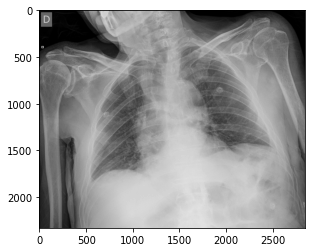

In [9]:
img= pydicom.dcmread(df['fpath'].iloc[2])
print(img)

plt.imshow(img.pixel_array, cmap=plt.cm.gray)
plt.show()

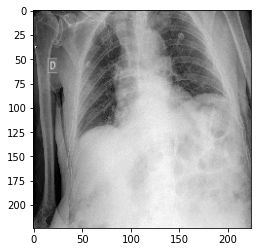

In [10]:
import cv2

nrows = 224
ncols = 224

img= pydicom.dcmread(df['fpath'].iloc[3])
resized_img=cv2.resize(img.pixel_array,(nrows,ncols))
# print(img)

plt.imshow(resized_img, cmap=plt.cm.gray)
plt.show()

In [11]:
print('total patients: ', df['patient ID'].nunique())
print('total instances: ', df['instance_id'].nunique())
print('total studies: ', df['study_id'].nunique())

total patients:  3261
total instances:  6334
total studies:  6054


In [12]:
image_data = pd.read_csv(extras[1])
study_data = pd.read_csv(extras[2])
image_data['id']= image_data['id'].str.strip(' _image')
study_data['id']= study_data['id'].str.strip(' _study')
print(image_data.shape)
print(image_data['StudyInstanceUID'].nunique())
print(study_data.shape)

(6334, 4)
6054
(6054, 5)


In [13]:
print(image_data.head())
print(study_data.head())

             id                                              boxes  \
0  000a312787f2  [{'x': 789.28836, 'y': 582.43035, 'width': 102...   
1  000c3a3f293f                                                NaN   
2  0012ff7358bc  [{'x': 677.42216, 'y': 197.97662, 'width': 867...   
3  001398f4ff4f  [{'x': 2729, 'y': 2181.33331, 'width': 948.000...   
4  001bd15d1891  [{'x': 623.23328, 'y': 1050, 'width': 714, 'he...   

                                               label StudyInstanceUID  
0  opacity 1 789.28836 582.43035 1815.94498 2499....     5776db0cec75  
1                                     none 1 0 0 1 1     ff0879eb20ed  
2  opacity 1 677.42216 197.97662 1545.21983 1197....     9d514ce429a7  
3    opacity 1 2729 2181.33331 3677.00012 2785.33331     28dddc8559b2  
4  opacity 1 623.23328 1050 1337.23328 2156 opaci...     dfd9fdd85a3e  
             id  Negative for Pneumonia  Typical Appearance  \
0  00086460a852                       0                   1   
1  000c9c05fd14      

In [14]:
# image_data['boxes'].iloc[0]
# image_data['boxes'].iloc[0].split('},')
# image_data['label'].iloc[0]

image_data.drop('boxes',axis=1, inplace=True) # we can infer same from label column

In [15]:
image_data.head()

,id,label,StudyInstanceUID
0,000a312787f2,opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75
1,000c3a3f293f,none 1 0 0 1 1,ff0879eb20ed
2,0012ff7358bc,opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7
3,001398f4ff4f,opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2
4,001bd15d1891,opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e


In [16]:
# splitting label column to individual bounding boxes

def splits(s):
    lst=[]
    for i in range(0,len(s.split(' ')),6):
        lst.append(' '.join(s.split(' ')[i:i+6]))
    return(lst)
    
image_data['label'] = image_data['label'].apply(splits)
image_data.label.iloc[0]

['opacity 1 789.28836 582.43035 1815.94498 2499.73327',
 'opacity 1 2245.91208 591.20528 3340.5737 2352.75472']

In [17]:
# redistributing each bounding box in separate rows for an image instance
image_data = image_data.explode('label', ignore_index=True)

In [18]:
image_data.head()

,id,label,StudyInstanceUID
0,000a312787f2,opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75
1,000a312787f2,opacity 1 2245.91208 591.20528 3340.5737 2352....,5776db0cec75
2,000c3a3f293f,none 1 0 0 1 1,ff0879eb20ed
3,0012ff7358bc,opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7
4,0012ff7358bc,opacity 1 1792.69064 402.5525 2409.71798 1606....,9d514ce429a7


In [19]:
image_data[['opacity','prob_','x1','y1','x2','y2']] = image_data.label.str.split(" ",expand=True)
image_data.head()

,id,label,StudyInstanceUID,opacity,prob_,x1,y1,x2,y2
0,000a312787f2,opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,opacity,1,789.28836,582.43035,1815.94498,2499.73327
1,000a312787f2,opacity 1 2245.91208 591.20528 3340.5737 2352....,5776db0cec75,opacity,1,2245.91208,591.20528,3340.5737,2352.75472
2,000c3a3f293f,none 1 0 0 1 1,ff0879eb20ed,none,1,0,0,1,1
3,0012ff7358bc,opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,opacity,1,677.42216,197.97662,1545.21983,1197.75876
4,0012ff7358bc,opacity 1 1792.69064 402.5525 2409.71798 1606....,9d514ce429a7,opacity,1,1792.69064,402.5525,2409.71798,1606.9105


In [20]:
print(image_data.opacity.nunique())
print(image_data.prob_.nunique())
image_data['opacity'] = image_data.opacity.replace({'opacity':1, 'none':0})
image_data.drop(['prob_','label'], inplace=True, axis=1)
image_data.head()

,id,StudyInstanceUID,opacity,x1,y1,x2,y2
0,000a312787f2,5776db0cec75,1,789.28836,582.43035,1815.94498,2499.73327
1,000a312787f2,5776db0cec75,1,2245.91208,591.20528,3340.5737,2352.75472
2,000c3a3f293f,ff0879eb20ed,0,0,0,1,1
3,0012ff7358bc,9d514ce429a7,1,677.42216,197.97662,1545.21983,1197.75876
4,0012ff7358bc,9d514ce429a7,1,1792.69064,402.5525,2409.71798,1606.9105


In [21]:
image_data.columns = ['instance_id', 'StudyInstanceUID', 'opacity', 'x1', 'y1', 'x2', 'y2']
# image_data.columns
image_data.head()

,instance_id,StudyInstanceUID,opacity,x1,y1,x2,y2
0,000a312787f2,5776db0cec75,1,789.28836,582.43035,1815.94498,2499.73327
1,000a312787f2,5776db0cec75,1,2245.91208,591.20528,3340.5737,2352.75472
2,000c3a3f293f,ff0879eb20ed,0,0,0,1,1
3,0012ff7358bc,9d514ce429a7,1,677.42216,197.97662,1545.21983,1197.75876
4,0012ff7358bc,9d514ce429a7,1,1792.69064,402.5525,2409.71798,1606.9105


In [22]:
# merging all datasets 
data_total = study_data.merge(image_data, left_on = 'id', right_on='StudyInstanceUID')\
                .merge(df, on='instance_id')
data_total.head()

,id,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance,instance_id,StudyInstanceUID,opacity,x1,y1,x2,y2,patient ID,gender,fpath,rows,columns,pixel_spacing,study_id
0,00086460a852,0,1,0,0,65761e66de9f,00086460a852,1,720.65215,636.51048,1052.84563,1284.63609,7d3bf0aef747,F,/kaggle/input/siim-covid19-detection/train/000...,2330,2783,"[0.148, 0.148]",00086460a852
1,00086460a852,0,1,0,0,65761e66de9f,00086460a852,1,2044.77989,847.90622,2374.65038,1424.01791,7d3bf0aef747,F,/kaggle/input/siim-covid19-detection/train/000...,2330,2783,"[0.148, 0.148]",00086460a852
2,005057b3f880,1,0,0,0,3019399c31f4,005057b3f880,0,0,0,1,1,f1894c76ef7b,F,/kaggle/input/siim-covid19-detection/train/005...,3052,3052,"[0.139, 0.139]",005057b3f880
3,0051d9b12e72,0,0,0,1,bb4b1da810f3,0051d9b12e72,1,812.54698,1376.41291,1435.14793,1806.42976,e2dbb0ae5e50,F,/kaggle/input/siim-covid19-detection/train/005...,2336,2836,"[0.15, 0.15]",0051d9b12e72
4,0051d9b12e72,0,0,0,1,bb4b1da810f3,0051d9b12e72,1,1973.32837,1368.49849,2424.4501999999998,1816.9821299999999,e2dbb0ae5e50,F,/kaggle/input/siim-covid19-detection/train/005...,2336,2836,"[0.15, 0.15]",0051d9b12e72


In [23]:
data_total.columns

Index(['id', 'Negative for Pneumonia', 'Typical Appearance',
       'Indeterminate Appearance', 'Atypical Appearance', 'instance_id',
       'StudyInstanceUID', 'opacity', 'x1', 'y1', 'x2', 'y2', 'patient ID',
       'gender', 'fpath', 'rows', 'columns', 'pixel_spacing', 'study_id'],
      dtype='object')

In [24]:
to_drop = ['StudyInstanceUID','study_id'] # repeated columns
data_total.drop(to_drop, axis=1, inplace=True)
ordered_cols = ['patient ID','id','gender', 'instance_id',
        'fpath', 'rows', 'columns', 'pixel_spacing', 
        'opacity', 'x1', 'y1', 'x2', 'y2',
        'Negative for Pneumonia', 'Typical Appearance','Indeterminate Appearance', 'Atypical Appearance',]
data_total=data_total[ordered_cols] # re-ordering columns

In [25]:
data_total.head()

,patient ID,id,gender,instance_id,fpath,rows,columns,pixel_spacing,opacity,x1,y1,x2,y2,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance
0,7d3bf0aef747,00086460a852,F,65761e66de9f,/kaggle/input/siim-covid19-detection/train/000...,2330,2783,"[0.148, 0.148]",1,720.65215,636.51048,1052.84563,1284.63609,0,1,0,0
1,7d3bf0aef747,00086460a852,F,65761e66de9f,/kaggle/input/siim-covid19-detection/train/000...,2330,2783,"[0.148, 0.148]",1,2044.77989,847.90622,2374.65038,1424.01791,0,1,0,0
2,f1894c76ef7b,005057b3f880,F,3019399c31f4,/kaggle/input/siim-covid19-detection/train/005...,3052,3052,"[0.139, 0.139]",0,0,0,1,1,1,0,0,0
3,e2dbb0ae5e50,0051d9b12e72,F,bb4b1da810f3,/kaggle/input/siim-covid19-detection/train/005...,2336,2836,"[0.15, 0.15]",1,812.54698,1376.41291,1435.14793,1806.42976,0,0,0,1
4,e2dbb0ae5e50,0051d9b12e72,F,bb4b1da810f3,/kaggle/input/siim-covid19-detection/train/005...,2336,2836,"[0.15, 0.15]",1,1973.32837,1368.49849,2424.4501999999998,1816.9821299999999,0,0,0,1


In [26]:
data_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4947 entries, 0 to 4946
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   patient ID                4947 non-null   object
 1   id                        4947 non-null   object
 2   gender                    4947 non-null   object
 3   instance_id               4947 non-null   object
 4   fpath                     4947 non-null   object
 5   rows                      4947 non-null   int64 
 6   columns                   4947 non-null   int64 
 7   pixel_spacing             4947 non-null   object
 8   opacity                   4947 non-null   int64 
 9   x1                        4947 non-null   object
 10  y1                        4947 non-null   object
 11  x2                        4947 non-null   object
 12  y2                        4947 non-null   object
 13  Negative for Pneumonia    4947 non-null   int64 
 14  Typical Appearance      

In [27]:
data_total[['x1','y1','x2','y2']] = data_total[['x1','y1','x2','y2']].astype('float') # changing coordinates dtype

<Figure size 432x288 with 0 Axes>

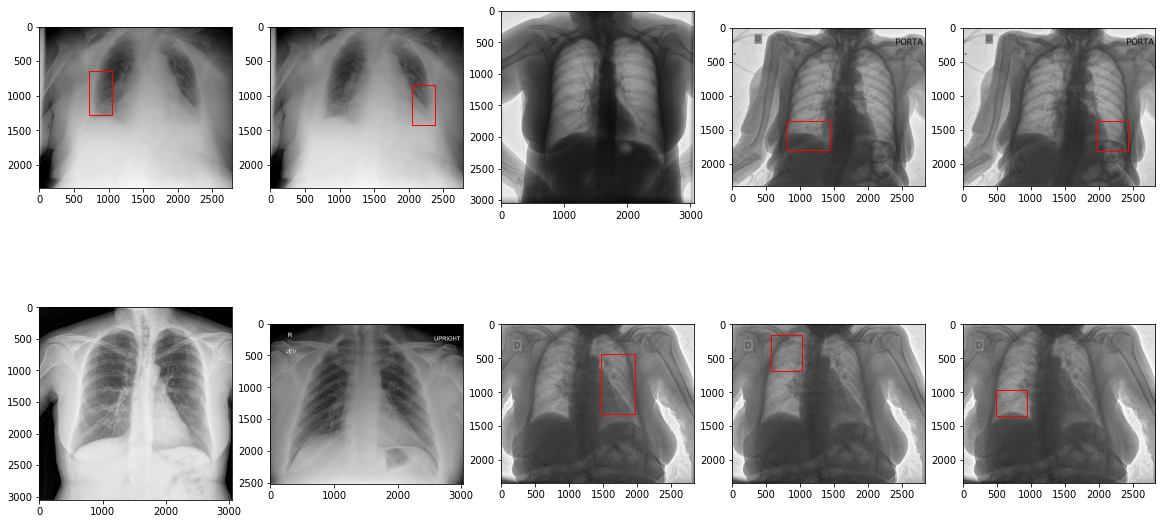

In [41]:
import matplotlib

# for row in data_total.iterrows():

#     row=row[1]
    
#     img = pydicom.dcmread(row['fpath'])
#     img.PhotometricInterpretation ='YBR_FULL'
    
#     fig, ax = plt.subplots()
#     plt.imshow(img.pixel_array, cmap=plt.cm.gray)
    
#     p = matplotlib.patches.Rectangle((row['x1'], row['y1']),
#                                    row['x2']-row['x1'], row['y2']-row['y1'], linewidth=1, edgecolor='r', facecolor='none')
#     ax.add_patch(p)
    
#     plt.show()

plt.figure()
fig, axes = plt.subplots(2,5, figsize=(20,10))
iterator = data_total.iterrows()
for i, ax in enumerate(axes.ravel()):
    row = next(iterator)[1]
    img = pydicom.dcmread(row['fpath'])
#     img.PhotometricInterpretation ='YBR_FULL'
    
    ax.imshow(img.pixel_array, cmap=plt.cm.gray)
    
    p = matplotlib.patches.Rectangle((row['x1'], row['y1']),
                                   row['x2']-row['x1'], row['y2']-row['y1'], linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(p)
    
plt.show() # plotting first 10 images with bounding boxes

In [49]:
for i in range(10):
    img = pydicom.dcmread(data_total.iloc[i]['fpath'])
    print(img.PhotometricInterpretation, img.Modality) # probable reason for gettig two kinds of xray images - two different techniques (DX and CR)

MONOCHROME2 DX
MONOCHROME2 DX
MONOCHROME1 CR
MONOCHROME1 DX
MONOCHROME1 DX
MONOCHROME2 DX
MONOCHROME2 CR
MONOCHROME1 DX
MONOCHROME1 DX
MONOCHROME1 DX


In [ ]:
# Next Steps:
# 1. Pixel transformation to nullify effect of two different techniques
# 2. Resizing images and saving as jpeg/png/ndarray
# 3. How to deal with bounding boxes as input label for object detection